In [1]:
%matplotlib inline
from qutip.qip.circuit import QubitCircuit
from qutip.qip.operations import gate_sequence_product
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from typing import *
from qutip.qip.device import CircularSpinChain, LinearSpinChain
from qutip.qip.noise import RandomNoise
from collections import Counter

In [25]:
def generate_permutations(values, occurrences):
    if sum(occurrences) == 0:
        yield []

    for i, (v, o) in enumerate(zip(values, occurrences)):
        if o > 0:
            occurrences[i] -= 1
            for p in generate_permutations(values, occurrences):
                yield [v] + p
            occurrences[i] += 1
            
def compute_triplet_profile(projectors, state):

    return [sum([expect(p, state) for p in ps]) for ps in projectors]

def generate_projectors(site_number):
    
    return [
        [
            tensor(perm)
            for perm in generate_permutations(
                [singlet_projector, triplet_projector], [site_number // 2 - i, i]
            )
        ]
        for i in range(site_number // 2 + 1)
    ]


singlet_projector = ((tensor(basis(2, 0), basis(2, 1)) - tensor(basis(2, 1), basis(2, 0))).unit().proj())
triplet_projector = tensor(identity(2), identity(2)) - singlet_projector


print(singlet_projector)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]


In [19]:
N=2
J1=1
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sx_list = []
sy_list = []
sz_list = []


for n in range(N):
        op_list = [si for m in range(N)]
        op_list[n] = sx
        sx_list.append(tensor(op_list))
        op_list[n] = sy
        sy_list.append(tensor(op_list))
        op_list[n] = sz
        sz_list.append(tensor(op_list))
H = 0
for n in range(N-1):
        H += J1 * sx_list[n] * sx_list[n+1]
        #H += J1 * sy_list[n] * sy_list[n+1]
        H += J1 * sz_list[n] * sz_list[n+1]


print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  1.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 1.  0.  0.  1.]]


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  1.]
 [ 0. -1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 1.  0.  0.  1.]]
[Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.70710678]
 [ 0.        ]]]


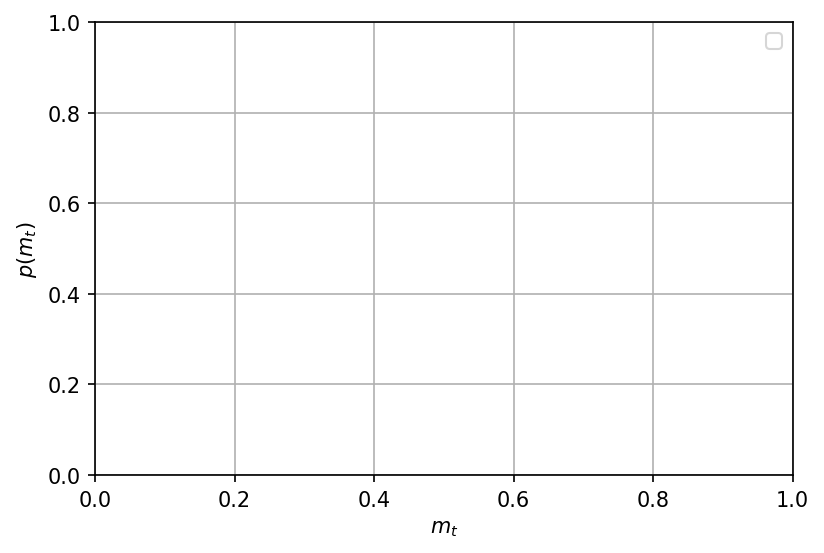

In [27]:
plt.figure(dpi=150)
plt.grid()
for i in np.arange(0,0.6,0.1):
    N=2
    J1=1
    J2=i
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
            op_list = [si for m in range(N)]
            op_list[n] = sx
            sx_list.append(tensor(op_list))
            #op_list[n] = sy
            #sy_list.append(tensor(op_list))
            op_list[n] = sz
            sz_list.append(tensor(op_list))
    H = 0
    for n in range(N-1):
            H += J1 * sx_list[n] * sx_list[n+1]
            #H += J1 * sy_list[n] * sy_list[n+1]
            H += J1 * sz_list[n] * sz_list[n+1]
    for n in range(N-2):
            H += J2 * sx_list[n] * sx_list[n+2]
            #H += J2 * sy_list[n] * sy_list[n+2]
            H += J2 * sz_list[n] * sz_list[n+2]

    #Periodic BC
    #H += J1 * sx_list[N-1] * sx_list[0]
    #H += J1 * sy_list[N-1] * sy_list[0]
    #H += J1 * sz_list[N-1] * sz_list[0]
    #H += J2 * sx_list[N-2] * sx_list[0]
    #H += J2 * sy_list[N-2] * sy_list[0]
    #H += J2 * sz_list[N-2] * sz_list[0]

    #Identify degenracy of GS Energy
    #print(H)
    gs_energy=min(H.eigenenergies())

    gs_energy_dict = dict(Counter(H.eigenenergies()))

    num_gs_energies=gs_energy_dict[gs_energy]    

    #Create GS Array of       
    gs=[]
    for i in range (0,num_gs_energies):
        state=H.eigenstates()[1][i]
        gs.append(state)

    #plt.plot(list(range(N // 2 + 1)),compute_triplet_profile(generate_projectors(N), gs[0]),label=f"J2 ={round(J2,2)}")
    plt.xlabel('$m_{t}$')
    plt.ylabel('$p(m_{t})$')
    plt.legend()
    
print(H)
print(gs)

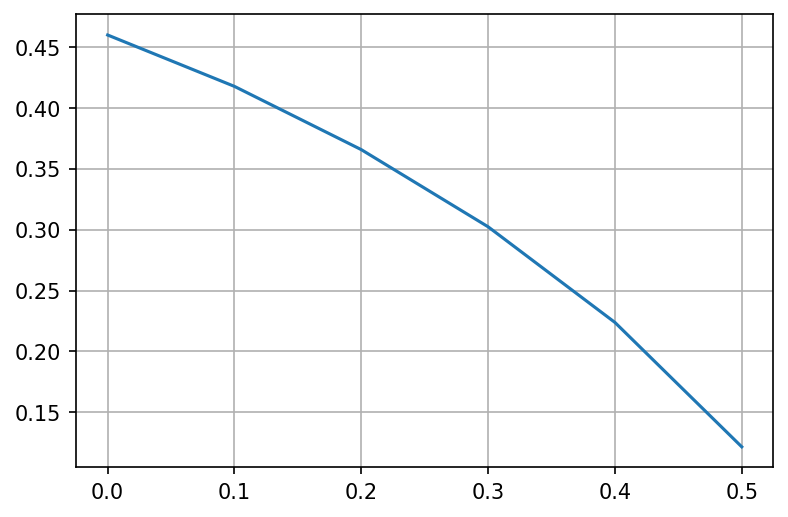

In [77]:
plt.figure(dpi=150)
plt.grid()
mt_3=[]
J2_val=[]
for i in np.arange(0,0.6,0.1):
    N=10
    J1=1
    J2=i
    si = qeye(2)
    sx = sigmax()
    #sy = sigmay()
    sz = sigmaz()
    sx_list = []
    #sy_list = []
    sz_list = []

    for n in range(N):
            op_list = [si for m in range(N)]
            op_list[n] = sx
            sx_list.append(tensor(op_list))
            #op_list[n] = sy
            #sy_list.append(tensor(op_list))
            op_list[n] = sz
            sz_list.append(tensor(op_list))
    H = 0
    for n in range(N-1):
            H += J1 * sx_list[n] * sx_list[n+1]
            #H += J1 * sy_list[n] * sy_list[n+1]
            H += J1 * sz_list[n] * sz_list[n+1]
    for n in range(N-2):
            H += J2 * sx_list[n] * sx_list[n+2]
            #H += J2 * sy_list[n] * sy_list[n+2]
            H += J2 * sz_list[n] * sz_list[n+2]

    #Periodic BC
    H += J1 * sx_list[N-1] * sx_list[0]
    #H += J1 * sy_list[N-1] * sy_list[0]
    H += J1 * sz_list[N-1] * sz_list[0]
    H += J2 * sx_list[N-2] * sx_list[0]
    #H += J2 * sy_list[N-2] * sy_list[0]
    H += J2 * sz_list[N-2] * sz_list[0]

    #Identify degenracy of GS Energy
    gs_energy=min(H.eigenenergies())

    gs_energy_dict = dict(Counter(H.eigenenergies()))

    num_gs_energies=gs_energy_dict[gs_energy]    

    #Create GS Array of       
    gs=[]
    for i in range (0,num_gs_energies):
        state=H.eigenstates()[1][i]
        gs.append(state)

    mt_3.append(compute_triplet_profile(generate_projectors(N), gs[0])[2])
    J2_val.append(J2)

plt.plot(J2_val,mt_3)

[0.5080451335485052, 4.721284437917603e-16, 0.12165607400852416, 0.13211796201097775, 0.16220102207841078, 0.07597980835358147]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


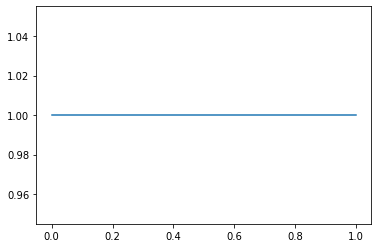

In [30]:
num_gs=[]
J2_val=[]
for i in np.arange(0,1.1,0.1):
    N=10
    J1=1
    J2=i
    si = qeye(2)
    sx = sigmax()
    #sy = sigmay()
    sz = sigmaz()
    sx_list = []
    #sy_list = []
    sz_list = []
    J2_val.append(i)
    for n in range(N):
            op_list = [si for m in range(N)]
            op_list[n] = sx
            sx_list.append(tensor(op_list))
            #op_list[n] = sy
            #sy_list.append(tensor(op_list))
            op_list[n] = sz
            sz_list.append(tensor(op_list))
    H = 0
    for n in range(N-1):
            H += J1 * sx_list[n] * sx_list[n+1]
            #H += J1 * sy_list[n] * sy_list[n+1]
            H += J1 * sz_list[n] * sz_list[n+1]

    #for n in range(N-2):
            #H += J2 * sx_list[n] * sx_list[n+2]
            #H += J2 * sy_list[n] * sy_list[n+2]
            #H += J2 * sz_list[n] * sz_list[n+2]


    #Identify degenracy of GS Energy
    gs_energy=min(H.eigenenergies())
    gs_energy_dict = dict(Counter(H.eigenenergies()))

    num_gs_energies=gs_energy_dict[gs_energy] 
    num_gs.append(num_gs_energies)

print(num_gs)
plt.plot(J2_val,num_gs)